In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5, -rand(d) * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S] * k  # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


## Computing the probability density

In [54]:
def compute_p(X, mean, sigma):
    """
    Implement
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    d = X.shape[0]
    coef = 1/ ((2*np.pi)**(d/2)*np.sqrt(np.linalg.det(sigma)))
    
    # Ici on mets pas de @ à la fin car on est intéréessé par la diagonale du résultat 
    # du coup on peux juste faire une multiplication terme par terme et faire la somme, c'est plus rapide
    exponent = np.sum(-1/2 * (X - mean) @ np.linalg.inv(sigma) * (X-mean),axis=1)
    return coef * np.exp(exponent)
    # ***************************************************
    raise NotImplementedError
    
#compute_p(X, means[0], sigmas[0])

In [55]:
ps = [
    compute_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping


In [56]:
assignments = np.argmax(ps, axis=0)
print(assignments)

[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


(100,)


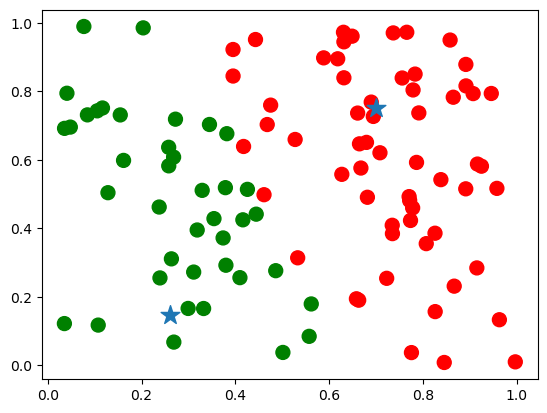

In [57]:
colors = np.array(["red", "green"])[assignments]
print(colors.shape)
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()

## Computing the log-probability directly

**Why log?** - Our goal is to compare probabilities to see to which of the two stars a point belongs.

But the formula for the probability is a bit heavy, with multiplications and exponents.

By applying a log transform, we get additions and multiplications, which is easer to handle, and does not impact the comparison - if `a > b`, `log(a) > log(b)`.

(If it does not make sense - don't worry - you'll see this in the coming lectures)


In [58]:
def compute_log_p(X, mean, sigma):
    """
    Implement
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    coef = 1/ ((2*np.pi)**(d/2)*np.sqrt(np.linalg.det(sigma)))
    exponent = np.sum(-1/2 * (X - mean) @ np.linalg.inv(sigma) * (X-mean),axis=1)
    
    return np.log(coef) + exponent
    # ***************************************************
    raise NotImplementedError

In [59]:
log_ps = [
    compute_log_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

In [60]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


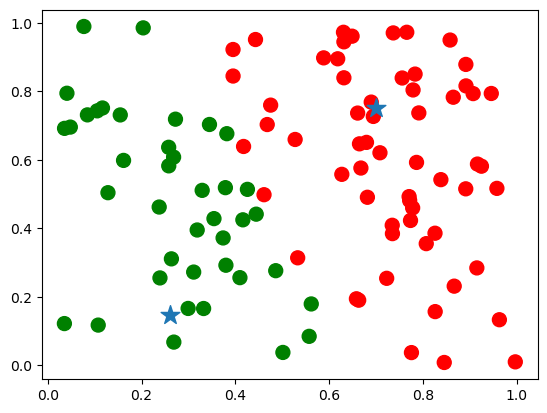

In [61]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()